In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
# Remove rows with missing values
df = df.dropna()
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
# Remove duplicate records
df = df.drop_duplicates()

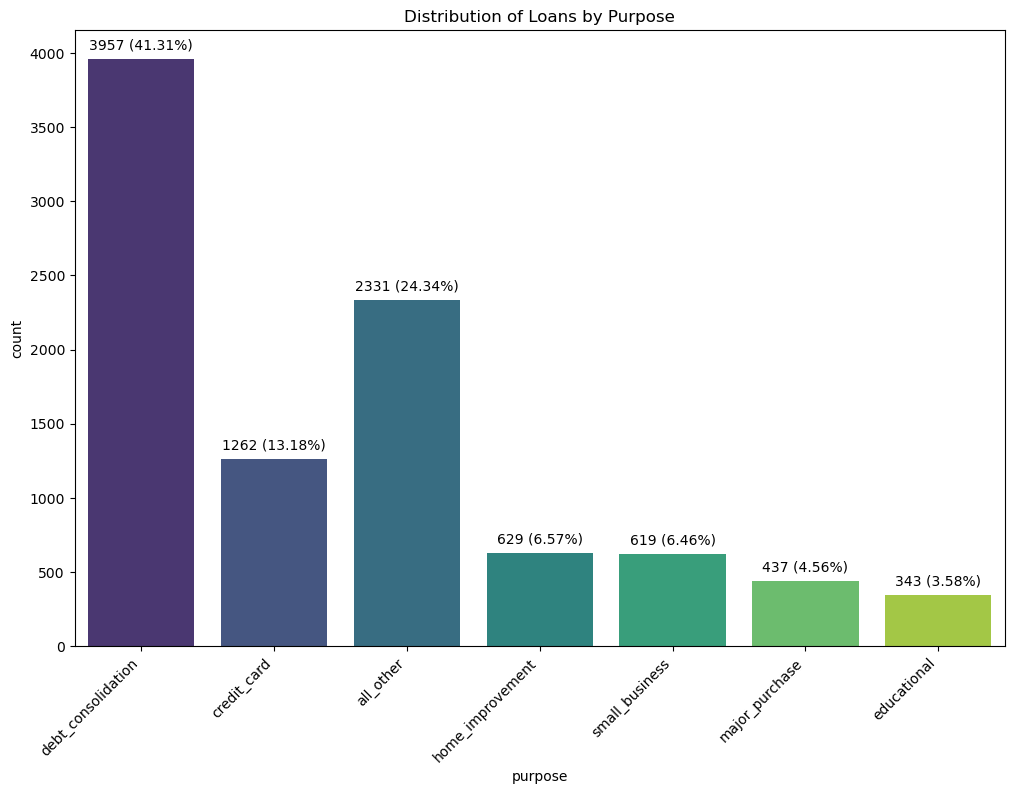

In [9]:
#histogram for 'purpose' with Count and Percentage
plt.figure(figsize=(12, 8))
sns.countplot(x='purpose', data=df, palette='viridis')
plt.title('Distribution of Loans by Purpose')
plt.xticks(rotation=45, ha='right')

total_count = len(df['purpose'])
for p in plt.gca().patches:
    count = p.get_height()
    percentage = count / total_count * 100
    plt.gca().annotate(f'{count} ({percentage:.2f}%)', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


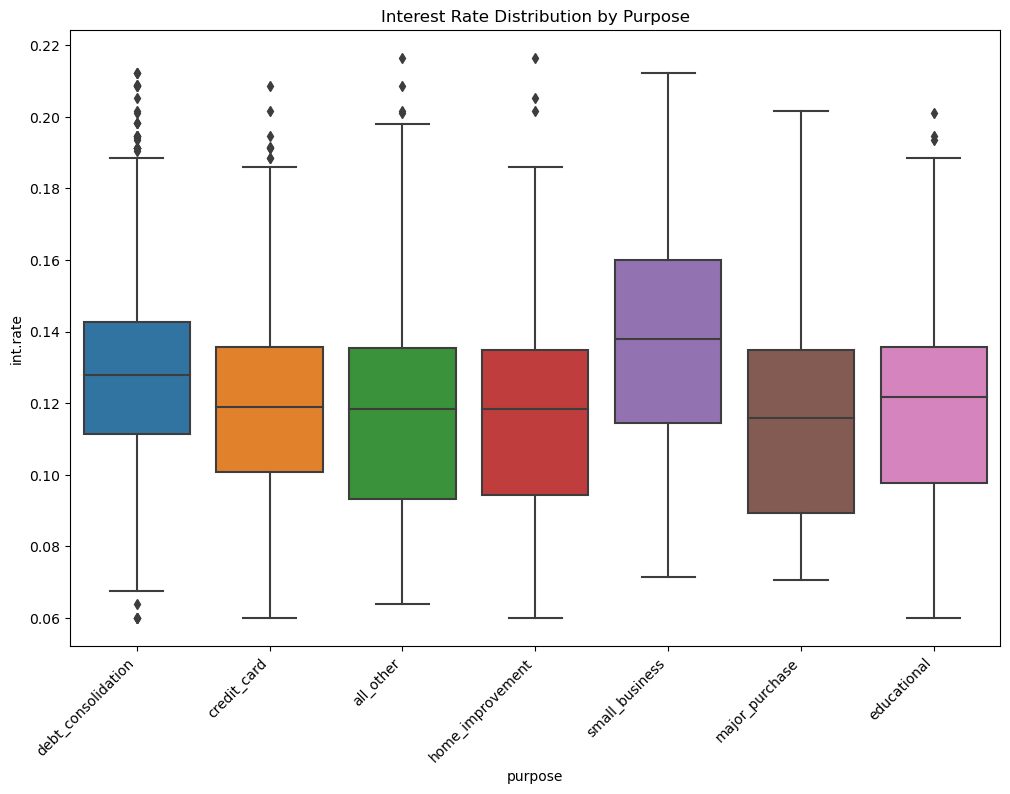

In [10]:
# Boxplot for int.rate by purpose
plt.figure(figsize=(12, 8))
sns.boxplot(x='purpose', y='int.rate', data=df)
plt.title('Interest Rate Distribution by Purpose')
plt.xticks(rotation=45, ha='right')
plt.show()

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760        0.016506   
not.fully.paid         -0

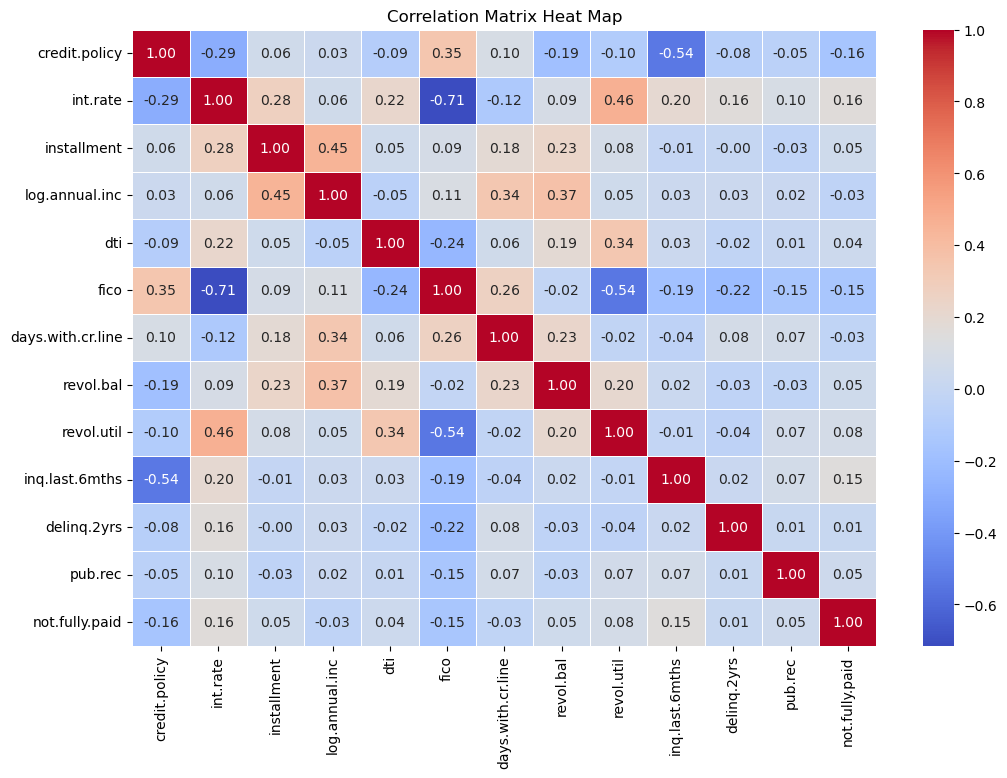

In [15]:
#correlation heatmap
corr_df = df.drop(['purpose'],axis=1)
correlation_matrix = corr_df.corr()
print(correlation_matrix)

# Create a heat map using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heat Map')
plt.show()

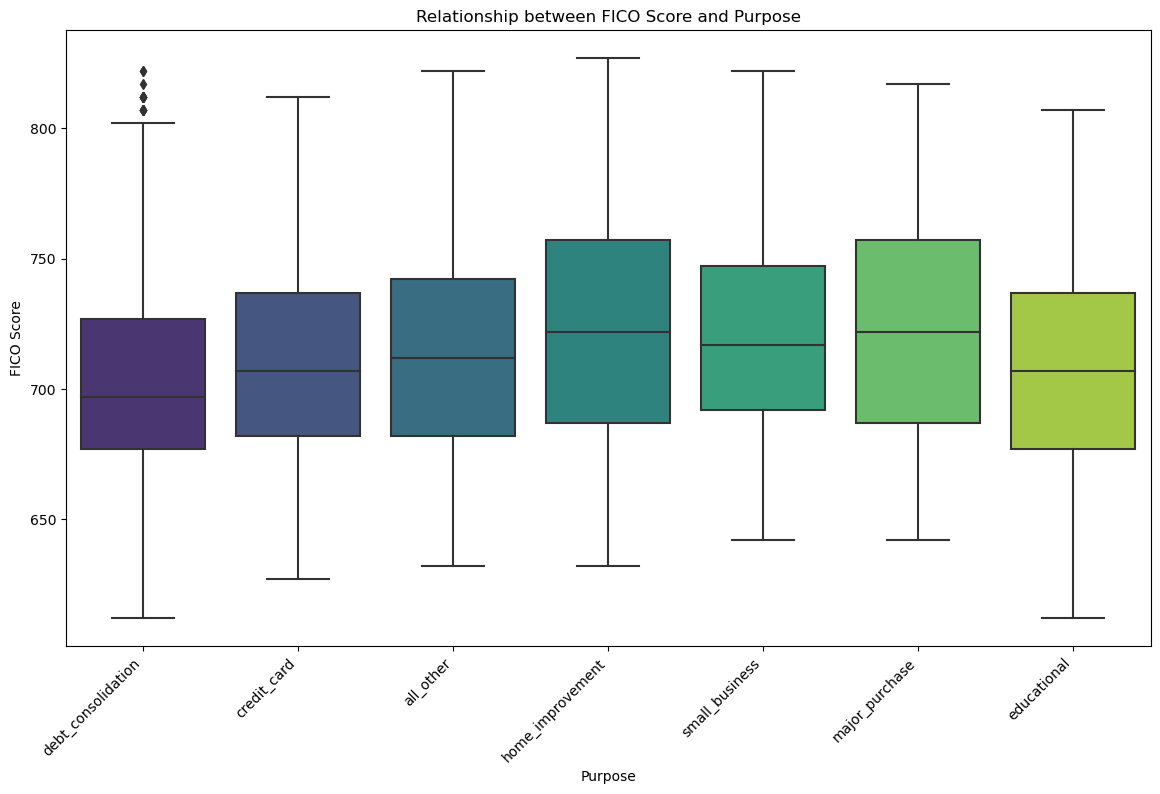

In [14]:
#relationship btw FICO score and Purpose
plt.figure(figsize=(14, 8))
sns.boxplot(x='purpose', y='fico', data=df, palette='viridis')
plt.title('Relationship between FICO Score and Purpose')
plt.xlabel('Purpose')
plt.ylabel('FICO Score')
plt.xticks(rotation=45, ha='right')
plt.show()


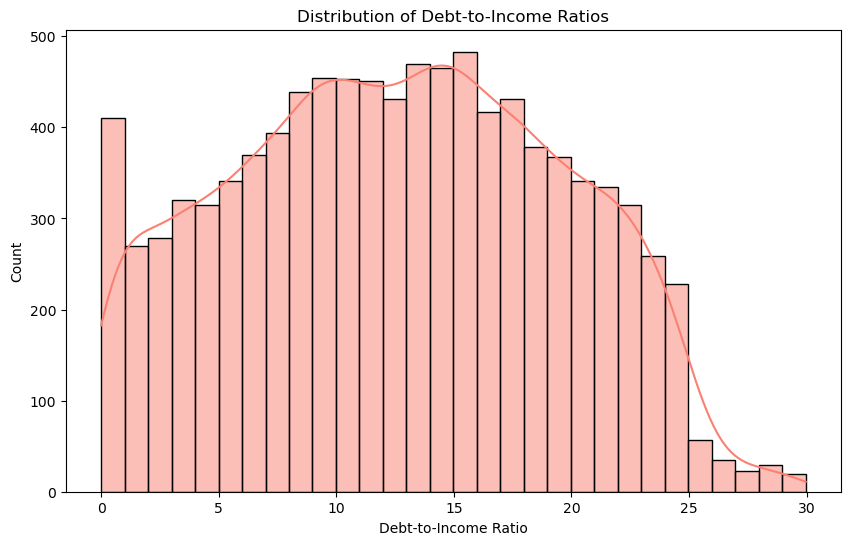

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['dti'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Debt-to-Income Ratios')
plt.xlabel('Debt-to-Income Ratio')
plt.show()


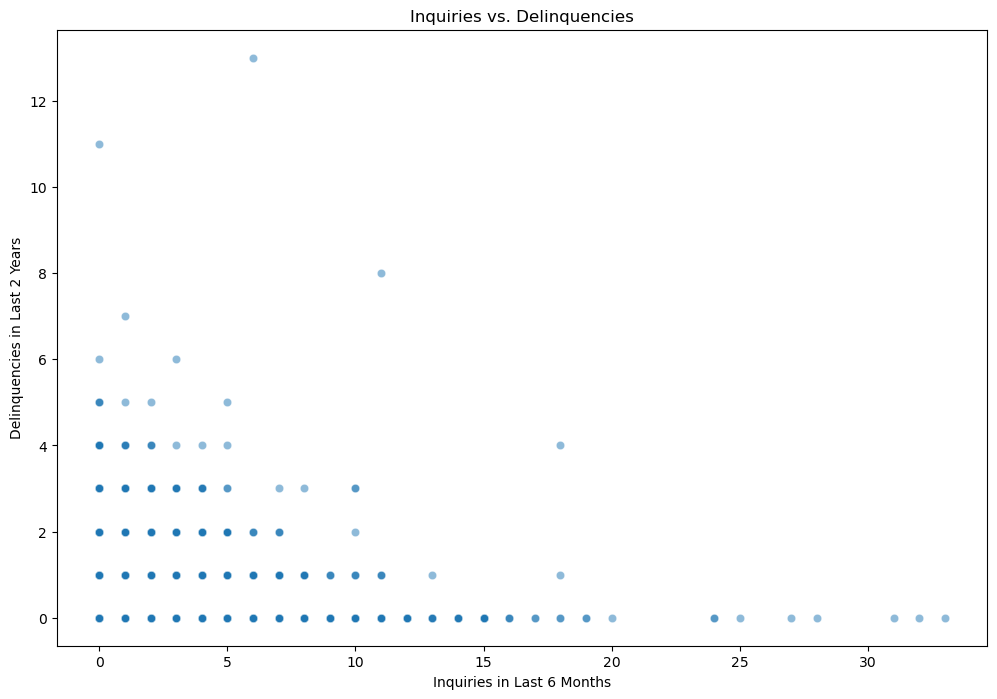

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='inq.last.6mths', y='delinq.2yrs', data=df, alpha=0.5)
plt.title('Inquiries vs. Delinquencies')
plt.xlabel('Inquiries in Last 6 Months')
plt.ylabel('Delinquencies in Last 2 Years')
plt.show()


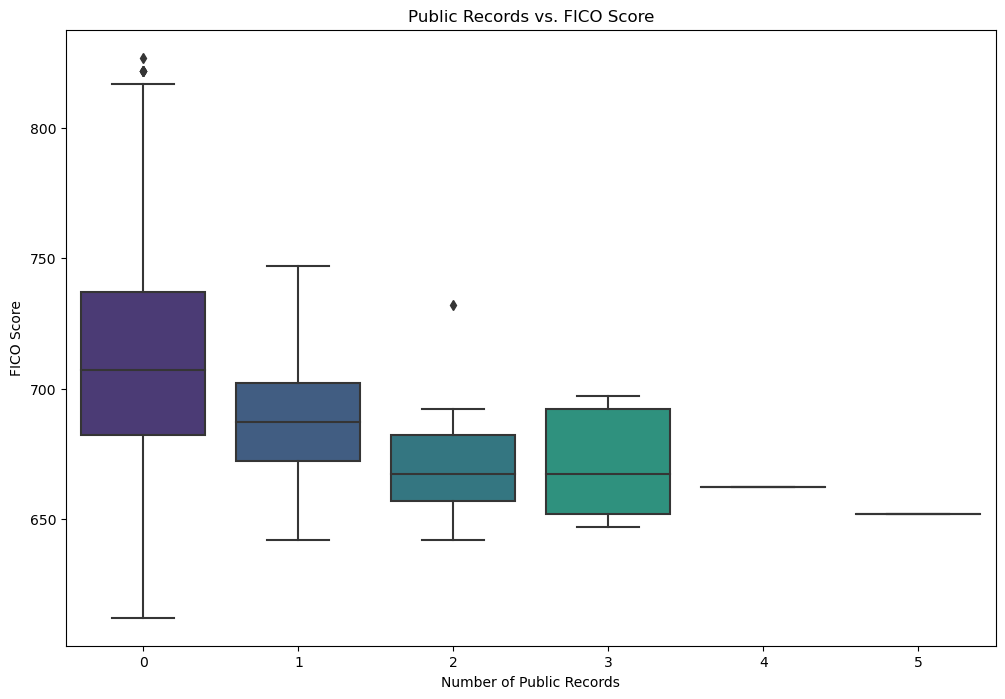

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='pub.rec', y='fico', data=df, palette='viridis')
plt.title('Public Records vs. FICO Score')
plt.xlabel('Number of Public Records')
plt.ylabel('FICO Score')
plt.show()


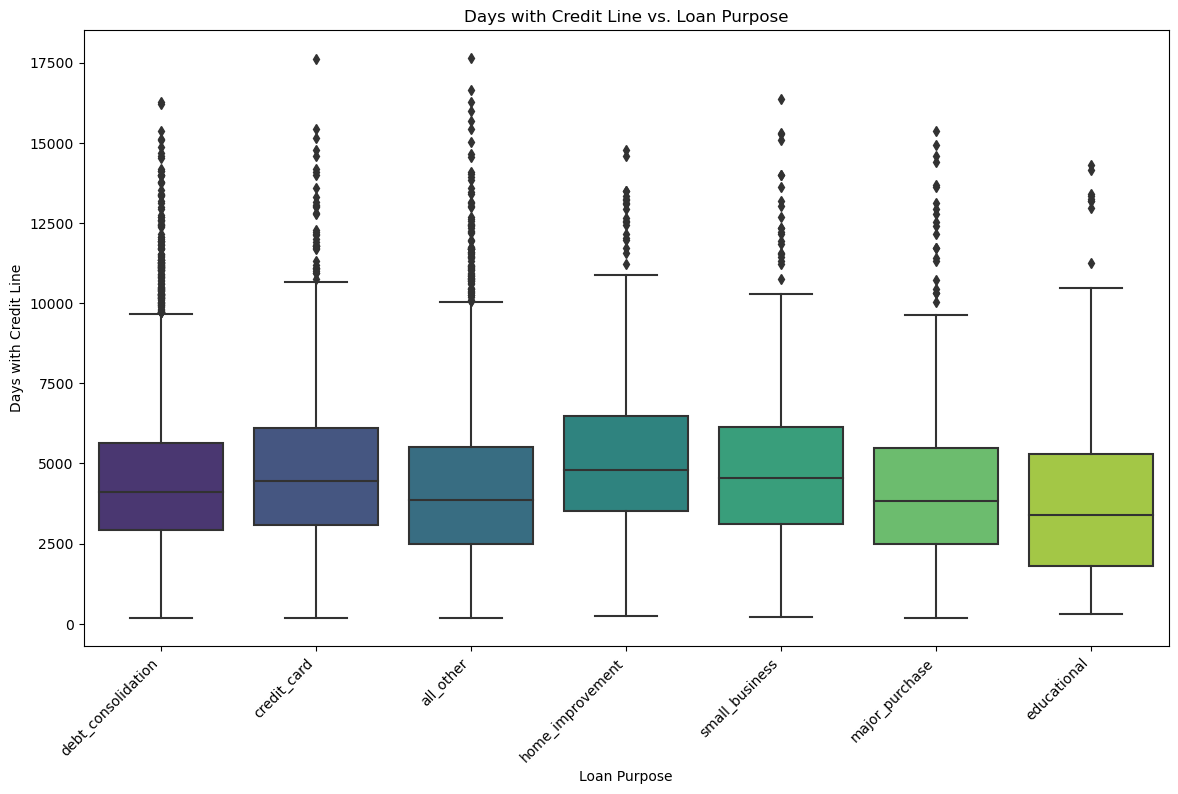

In [23]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='purpose', y='days.with.cr.line', data=df, palette='viridis')
plt.title('Days with Credit Line vs. Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Days with Credit Line')
plt.xticks(rotation=45, ha='right')
plt.show()
